In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# loading data
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train_y = train_data["SalePrice"]
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
data = pd.concat([train_data,test_data],ignore_index=True)
data = data.drop("SalePrice", 1)
ids = test_data["Id"]

In [3]:
train_data.shape

(1460, 81)

In [4]:
data.shape

(2919, 80)

In [5]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


Analyzing SalePrice data

In [6]:
train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

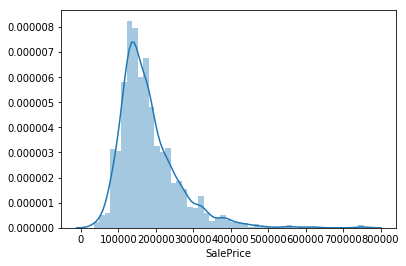

In [7]:
sns.distplot(train_data["SalePrice"])

We can see the graph is normally distributed. It has positive skewness and high kurtosis.

In [8]:
# find the characteristic of the distribution
print("skewness:", train_data["SalePrice"].skew())
print("kurtosis", train_data["SalePrice"].kurt())

skewness: 1.8828757597682129
kurtosis 6.536281860064529


SalePrice vs GrLivArea

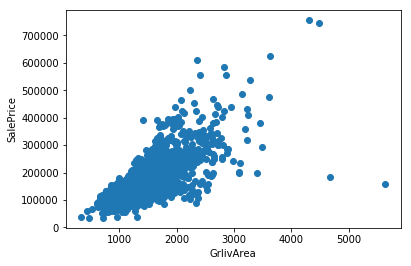

In [9]:
plt.scatter(train_data["GrLivArea"], train_data["SalePrice"])
plt.xlabel("GrlivArea")
plt.ylabel("SalePrice")
plt.show()

SalePrice vs TotalBsmtSF

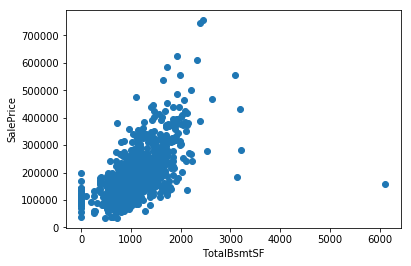

In [10]:
plt.scatter(train_data["TotalBsmtSF"], train_data["SalePrice"])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

SalePrice vs CentralAir

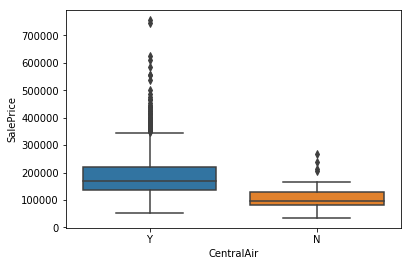

In [11]:
temp_data = pd.concat([train_data["SalePrice"], train_data["CentralAir"]], axis = 1)
fig = sns.boxplot(x = "CentralAir", y = "SalePrice", data = temp_data)

SalePrice vs OverallQual

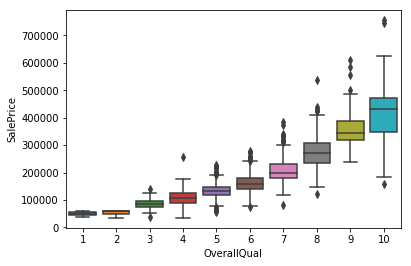

In [12]:
temp_data = pd.concat([train_data["SalePrice"], train_data["OverallQual"]], axis = 1)
fig = sns.boxplot(x = "OverallQual", y = "SalePrice", data = temp_data)

SalePrice vs YearBuilt

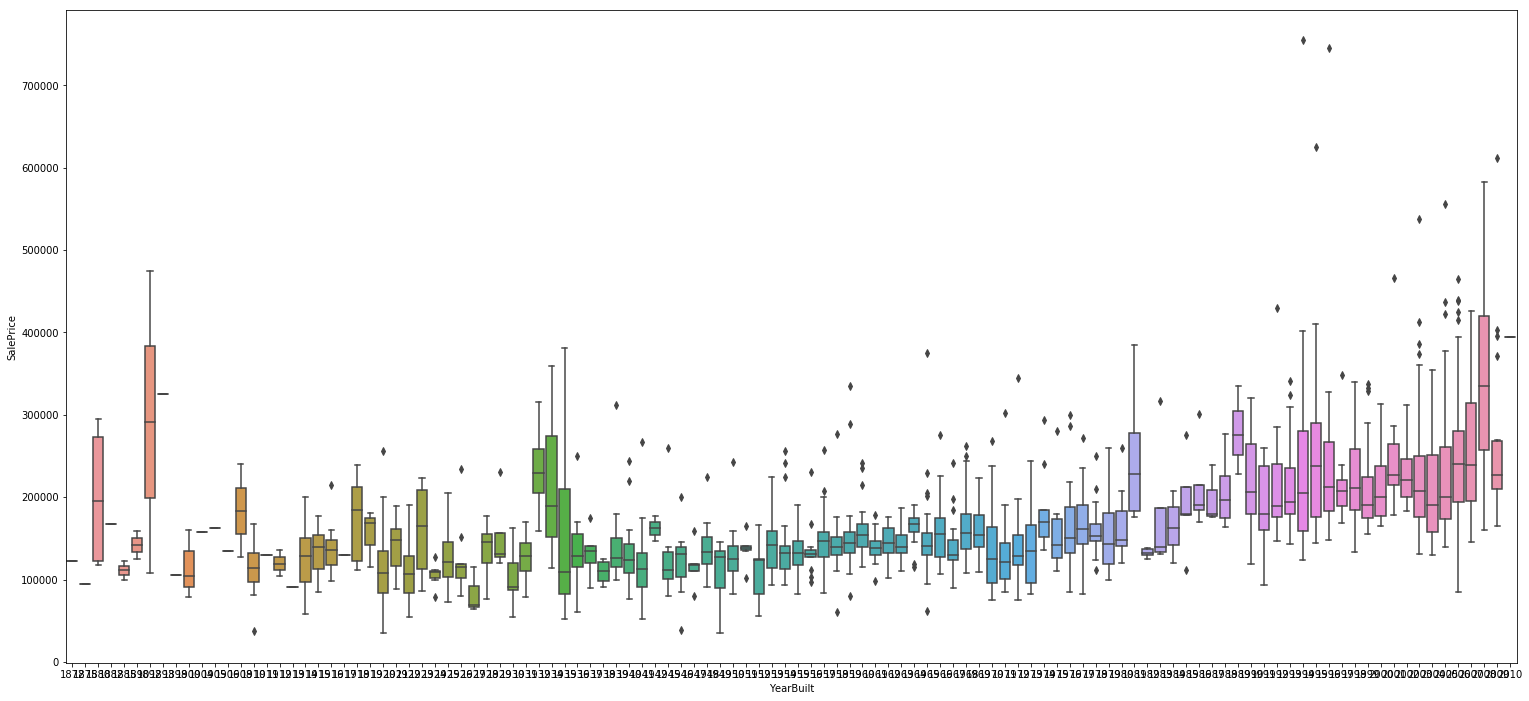

In [13]:
temp_data = pd.concat([train_data["SalePrice"], train_data["YearBuilt"]], axis = 1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x = "YearBuilt", y = "SalePrice", data = temp_data)

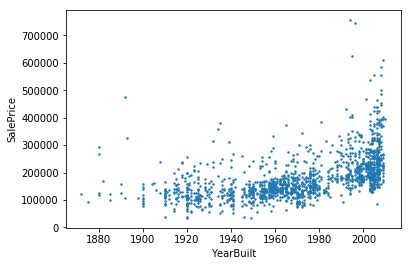

In [14]:
plt.scatter(train_data["YearBuilt"], train_data["SalePrice"], s = 2)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

SalePrice vs Neighborhood

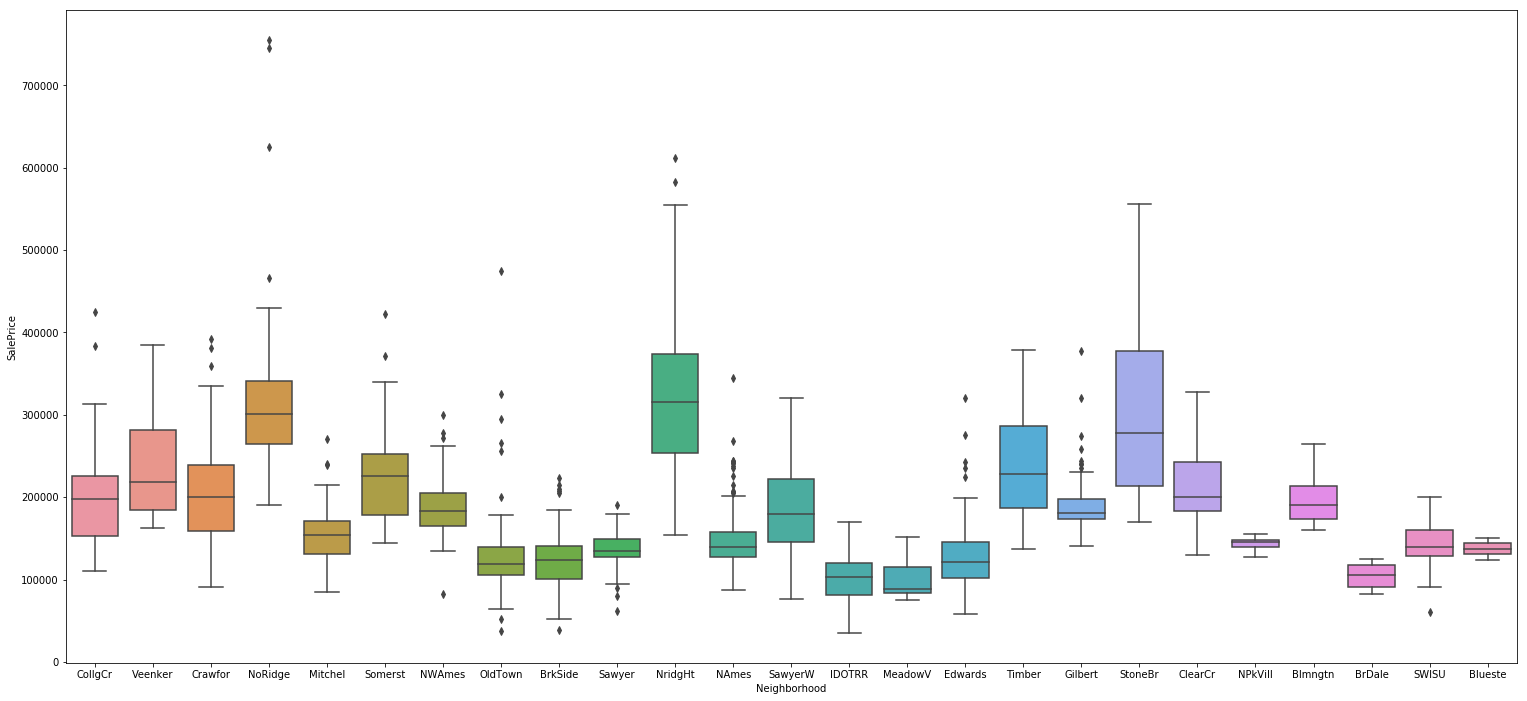

In [15]:
temp_data = pd.concat([train_data["SalePrice"], train_data["Neighborhood"]], axis = 1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x = "Neighborhood", y = "SalePrice", data = temp_data)

SalePrice vs LotArea

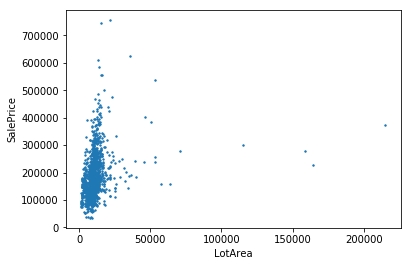

In [16]:
plt.scatter(train_data["LotArea"], train_data["SalePrice"], s = 2)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

SalePrice vs MiscVal

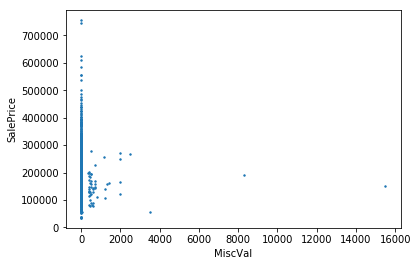

In [17]:
plt.scatter(train_data["MiscVal"], train_data["SalePrice"], s = 2)
plt.xlabel("MiscVal")
plt.ylabel("SalePrice")
plt.show()

SalePrice vs GarageArea

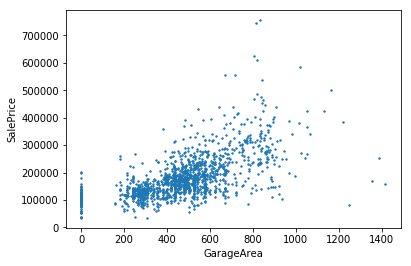

In [18]:
plt.scatter(train_data["GarageArea"], train_data["SalePrice"], s = 2)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

SalePrice vs GarageCars

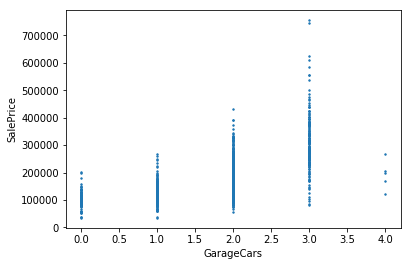

In [19]:
plt.scatter(train_data["GarageCars"], train_data["SalePrice"], s = 2)
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.show()

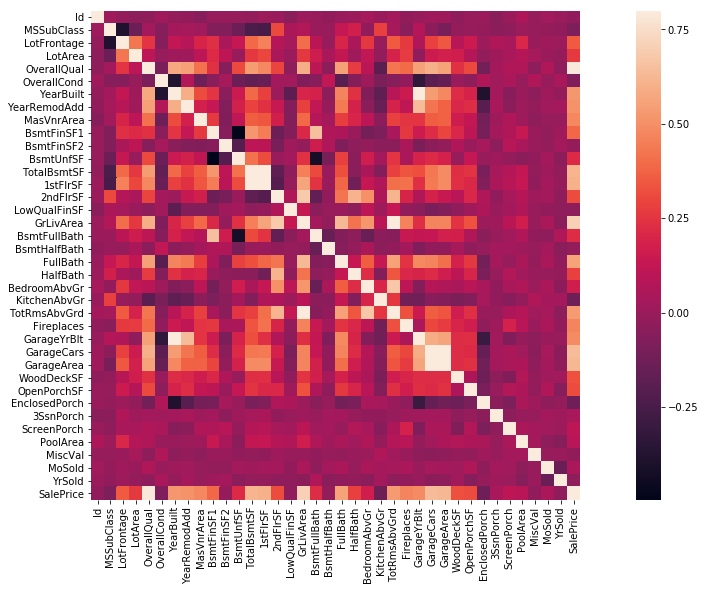

In [20]:
corr_max = train_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr_max, vmax = 0.8, square = True)

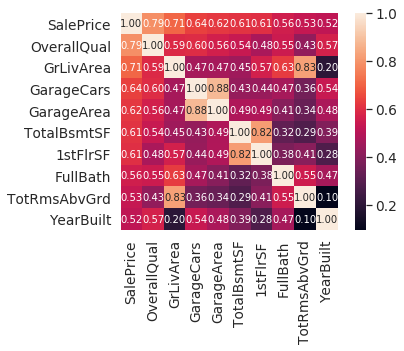

In [21]:
k = 10
cols = corr_max.nlargest(k, 'SalePrice').index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

Finally, according to the heatmap, we can conclude that the following variables have high correlations: <br />
GrLivArea <br />
TotRmsAbvGrd <br />
FullBath <br />
TotalBsmtSF <br />
GarageCars <br />
YearBuilt <br />
OverallQual <br />

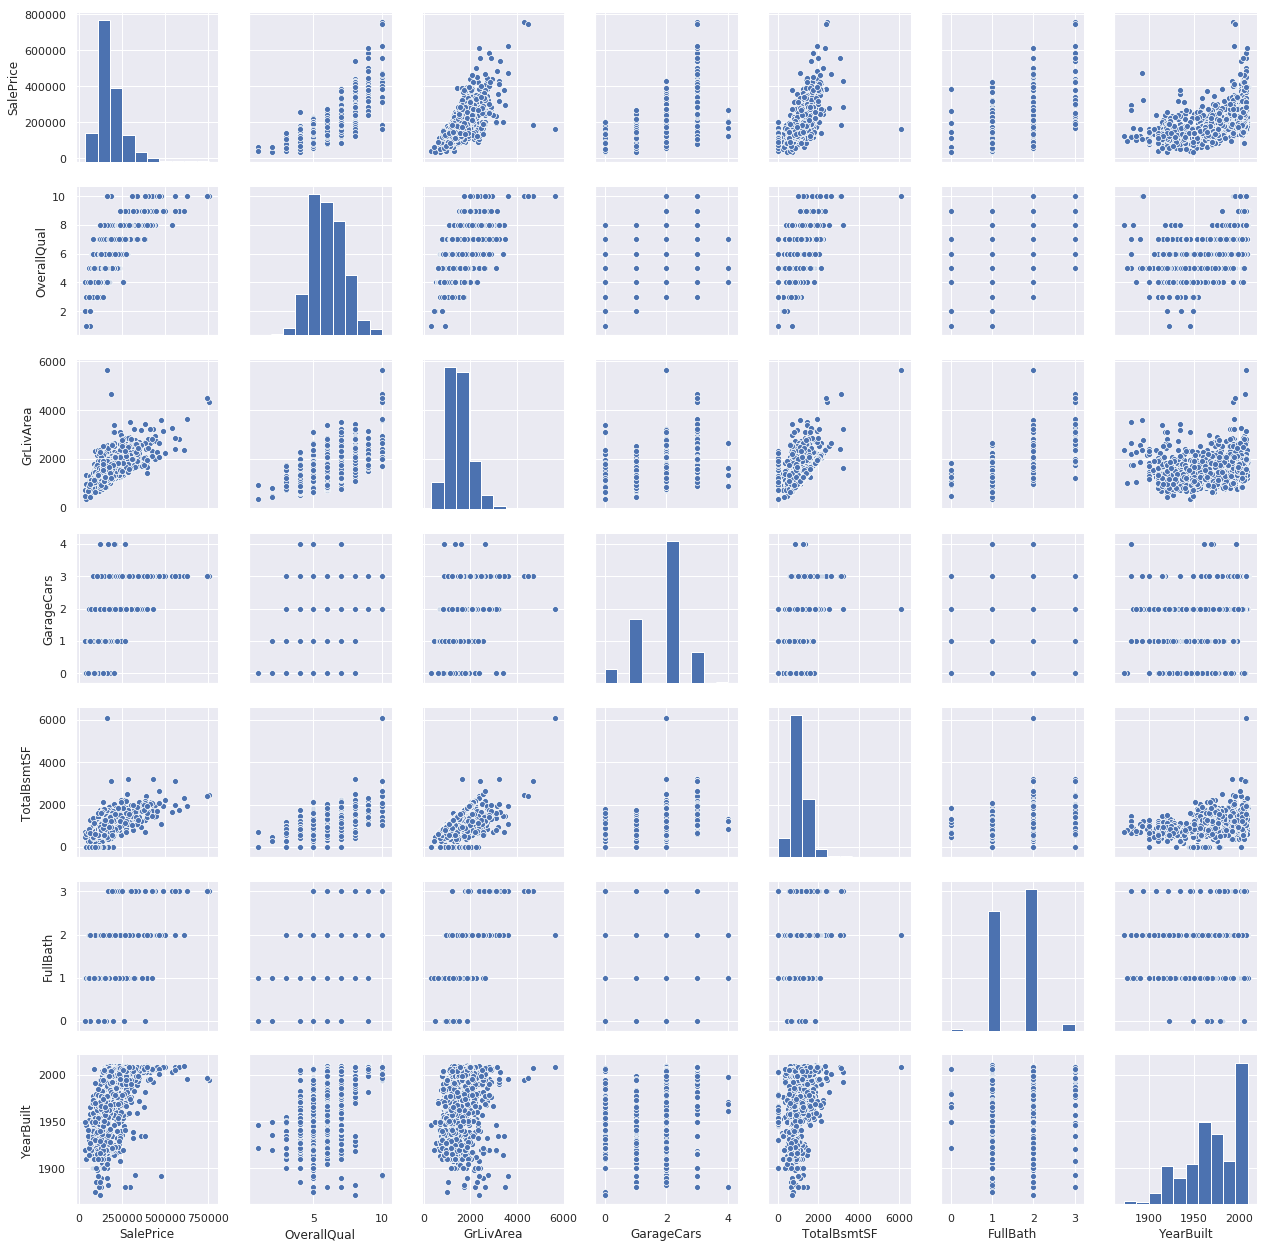

In [22]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show()

**Data Manipulation**<br />
* Apply hot encoding, convert categorical variable into dummy/indicator variables. <br />
* Fill NaN with median for that column.<br />
* Log transformation.<br />
* Change -inf to 0.<br />

In [23]:
total = data.isnull().sum().sort_values(ascending=False)
percentage = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageFinish,159,0.054471
GarageYrBlt,159,0.054471
GarageCond,159,0.054471


In [24]:
# Remove id and columns with more than a thousand missing values
data=data.drop("Id", 1)
data=data.drop("Alley", 1)
data=data.drop("Fence", 1)
data=data.drop("MiscFeature", 1)
data=data.drop("PoolQC", 1)
data=data.drop("FireplaceQu", 1)

In [25]:
# One Hot Encoding and nan transformation
data = pd.get_dummies(data)
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis = 0)
data = imp.fit_transform(data)

# Log transformation
data = np.log(data)
train_y = np.log(train_y)

# Change -inf to 0 again
data[data==-np.inf]=0

**Feature reduction** <br />
There are many features, so I am going to use PCA to reduce them. The idea is to start with n_components = number of columns. Then select the number of components according to the plot of the explained variance ratio.

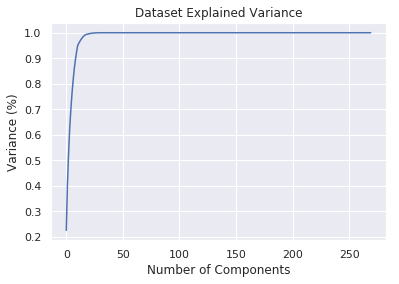

In [26]:
pca = PCA(whiten=True)
pca.fit(data)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [27]:
pca = PCA(n_components=35,whiten=True)
pca = pca.fit(data)
dataPCA = pca.transform(data)

In [28]:
# Split traing and test
train = data[:1460]
test = data[1460:]
print(train.shape, test.shape)

(1460, 270) (1459, 270)


(6, 1)


,R squared score
Lasso,0.853933
Linear,0.853790
Bayesian Ridge,0.852443
SVM Linear,0.849076
RandomForest,0.846297
SVM RBF,0.812019


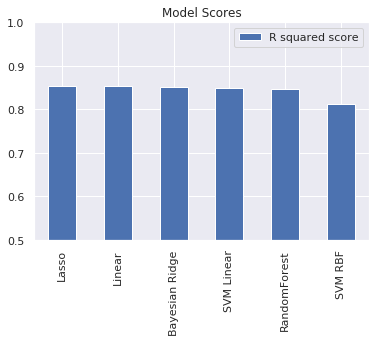

In [29]:
def test_k_fold(train,train_y):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, train_y, cv=cv,scoring=r2)
        scores= r2_val_score.mean()
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results, orient = 'index')
    results.columns = ["R squared score"]
    print(results.shape)
    results = results.sort_values(by=["R squared score"], ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

test_k_fold(train,train_y)

(1460, 35) (1459, 35)
(6, 1)


,R squared score
SVM Linear,0.857781
Bayesian Ridge,0.853637
Lasso,0.853586
Linear,0.853516
SVM RBF,0.794052
RandomForest,0.706664


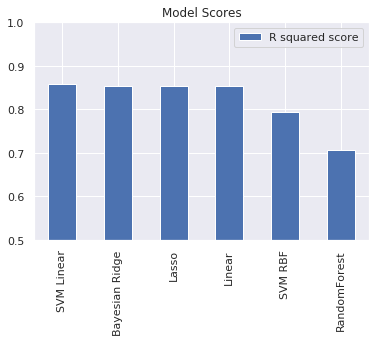

In [30]:
# Split traing and test
train = dataPCA[:1460]
test = dataPCA[1460:]
print(train.shape, test.shape)

test_k_fold(train,train_y)

In [31]:
train_x,test_x,train_y,test_y = train_test_split(train, train_y, test_size=0.33, random_state=42)
clf = svm.SVR(kernel="linear")
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
print(y_pred)

[11.95693528 12.66915741 11.62354678 12.05117062 12.59442674 11.18529709
 12.39455159 11.87812582 11.16514821 11.89197852 11.794057   11.62861848
 11.39707502 12.25190133 12.14619814 11.82456866 12.23265873 11.88646409
 11.57400468 12.33285267 12.06337893 12.24464858 12.15949491 11.77137473
 12.25642897 12.03602901 12.2303838  11.59042215 12.11696486 12.10863741
 11.73435612 12.47944556 12.21762003 11.60650766 12.47759839 11.89885637
 11.86776686 12.26663983 12.6559966  11.49521845 11.63031454 12.43762037
 11.64944182 12.5674047  11.72130816 11.71411857 11.60181229 11.72804267
 12.76067125 11.83266785 11.64493954 12.2695995  11.64721587 12.74459394
 11.91162322 12.45765893 12.30556696 11.95823746 11.89467913 11.5609585
 11.12683459 11.8677985  12.52882878 12.42593303 12.5171002  12.3652521
 11.5436508  12.62177312 11.71402395 12.01729559 11.72044988 11.75836247
 11.53144912 11.19645058 12.88925448 12.04772927 12.56296418 12.56600126
 11.72321766 11.67694826 11.69679611 11.32997691 11.7

In [32]:
print(test_y.values)

[11.94794938 12.69158046 11.65268741 11.97665948 12.66191396 11.23188794
 12.64915462 11.8913619  11.34450681 11.81672692 11.88448902 11.77528973
 11.30220443 12.27373129 12.10625231 11.80931948 12.11996995 11.81303006
 11.681824   12.32829028 11.9511804  12.25486281 12.06393288 11.76756768
 12.16525065 11.94405832 12.10699237 11.85651517 12.10625231 12.24961095
 11.75194237 12.55672952 12.20856953 11.81857024 12.44901882 11.8493977
 11.83500896 12.29910751 12.64432758 11.48246626 11.6483301  12.23076526
 11.69107165 12.4423022  11.76368418 11.67419361 11.65268741 11.75194237
 13.02132683 11.87756858 11.68687877 12.18586994 11.65268741 12.56723749
 11.88103479 12.46843691 12.26904744 12.07254125 11.58058411 11.58524613
 11.13458902 11.94470788 12.66665705 12.48420426 12.55483688 12.40081672
 11.59910316 12.62806706 11.44571672 12.07823927 11.68568478 11.80559508
 11.59917655 11.44571672 13.32392695 12.06104687 12.75995776 12.73963776
 11.85651517 11.7352687  11.6784399  11.1124479  11.

In [33]:
y_pred = clf.predict(test)
y_pred = np.exp(y_pred)
y_pred = y_pred.reshape(-1,)

sub = pd.DataFrame({
        "Id": ids,
        "SalePrice": y_pred
    })

sub.to_csv("prices_submission.csv", index=False)



